In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [3]:
inChans = 3
outChans = 15
krnSize = 5
stride = 1
padding = 0

c = nn.ConvTranspose2d(inChans,outChans,krnSize,stride,padding)

torch.Size([1, 3, 64, 64])
(64, 64, 3)


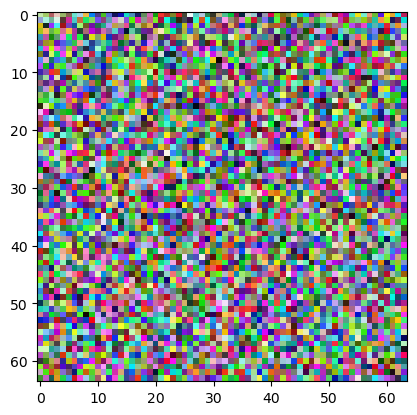

In [9]:
imsize = (1,3,64,64)

img = torch.rand(imsize)

img2view = np.squeeze(img.permute(2,3,1,0).numpy())
print(img.shape)
print(img2view.shape)

plt.imshow(img2view)
plt.show()

In [11]:
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 68, 68])


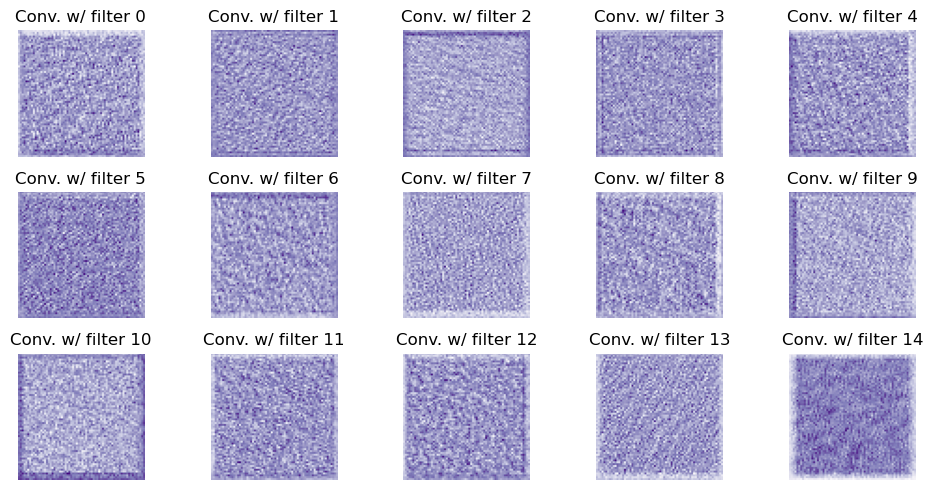

In [13]:
fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()